In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import datetime

<ipython-input-1-d3e30fb8ed31>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
data=pd.read_csv('/content/poulation.csv')

In [3]:
data.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [4]:
data.isnull().sum()

realtime_start    0
value             0
date              0
realtime_end      0
dtype: int64

In [6]:
data['Date'] = pd.to_datetime(data['date'])

In [10]:
data.set_index("Date",inplace=True)

In [11]:
df=data.drop(["realtime_end","realtime_start"],axis=1)

In [12]:
df

,value
Date,
1952-01-01,156309.000
1952-02-01,156527.000
1952-03-01,156731.000
1952-04-01,156943.000
1952-05-01,157140.000
...,...
2019-08-01,329591.333
2019-09-01,329785.872
2019-10-01,329982.035


<Axes: xlabel='Date'>

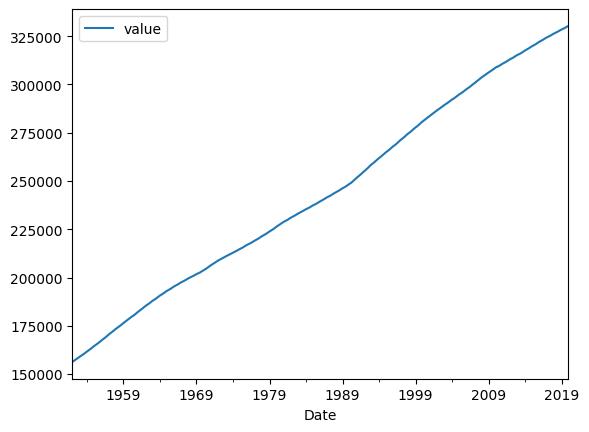

In [13]:
df.plot()

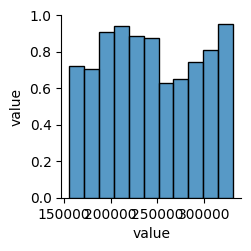

In [14]:
sns.pairplot(df)

In [15]:
df.columns

Index(['value'], dtype='object')

In [16]:
upsampling=df.resample("")

In [21]:
daily=upsampling.sum()

In [22]:
daily

,value
Date,
1952-01-01,156309.000
1952-01-02,0.000
1952-01-03,0.000
1952-01-04,0.000
1952-01-05,0.000
...,...
2019-11-27,0.000
2019-11-28,0.000
2019-11-29,0.000


<Axes: xlabel='Date'>

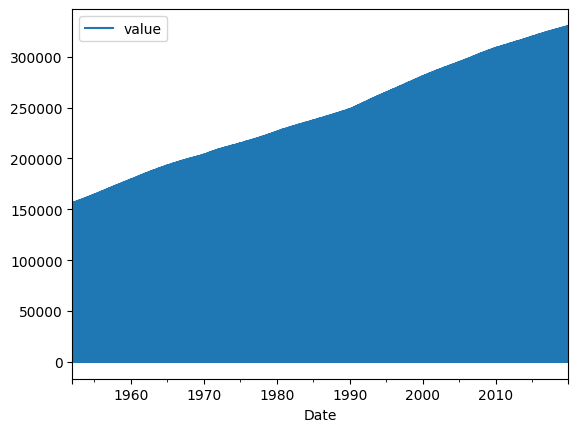

In [23]:
daily.plot()

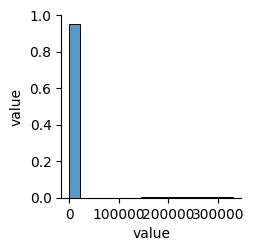

In [26]:
sns.pairplot(daily)

In [27]:
downsampling=df.resample("Q")

In [28]:
quarter=downsampling.mean()

In [29]:
quarter

,value
Date,
1952-03-31,156522.333333
1952-06-30,157142.000000
1952-09-30,157801.333333
1952-12-31,158504.666667
1953-03-31,159164.000000
...,...
2018-12-31,328157.891667
2019-03-31,328607.133000
2019-06-30,329050.519333


<Axes: xlabel='Date'>

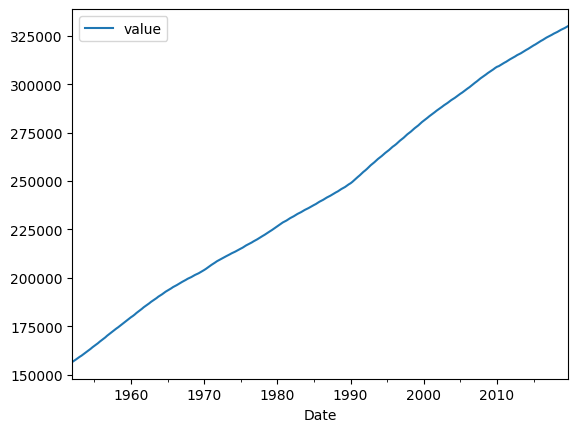

In [31]:
quarter.plot()

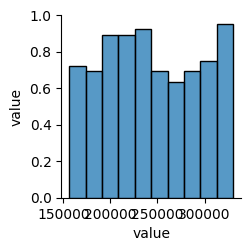

In [32]:
sns.pairplot(quarter)

In [33]:
down=df.resample("A")

In [34]:
annual=down.sum()

<Axes: xlabel='Date'>

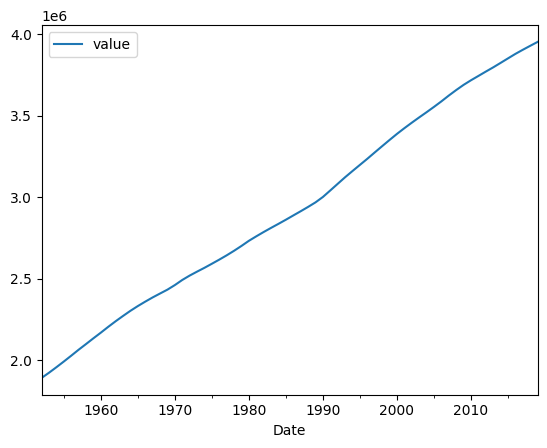

In [35]:
annual.plot()

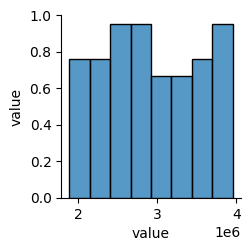

In [38]:
sns.pairplot(annual)